In [1]:
import pandas as pd
from sklearn.cluster import KMeans  
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#loading in data

df=pd.read_csv('customer_segmentation_data.csv')

In [3]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [4]:
#looking for any duplicates in the dataset

df.duplicated().sum()

0

In [5]:
#looking for any missing values

df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

In [6]:
#understanding column data types

print(df.dtypes)

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.50000,288.819436,1.0,250.7500,500.500,750.25,1000.00
age,1000.0,43.78300,15.042213,18.0,30.0000,45.000,57.00,69.00
income,1000.0,88500.80000,34230.771122,30004.0,57911.7500,87845.500,116110.25,149973.00
spending_score,1000.0,50.68500,28.955175,1.0,26.0000,50.000,76.00,100.00
membership_years,1000.0,5.46900,2.855730,1.0,3.0000,5.000,8.00,10.00
purchase_frequency,1000.0,26.59600,14.243654,1.0,15.0000,27.000,39.00,50.00
last_purchase_amount,1000.0,492.34867,295.744253,10.4,218.7625,491.595,747.17,999.74


In [8]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

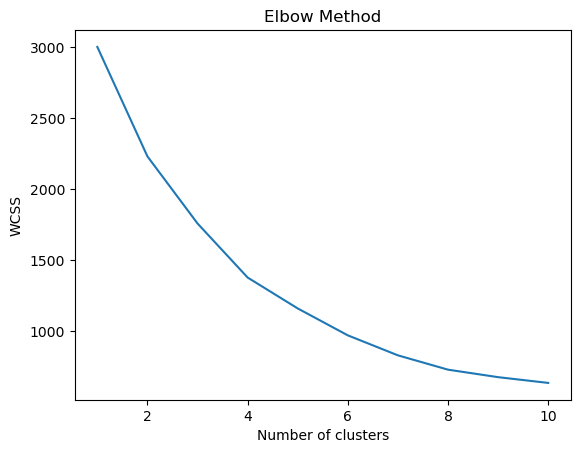

C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


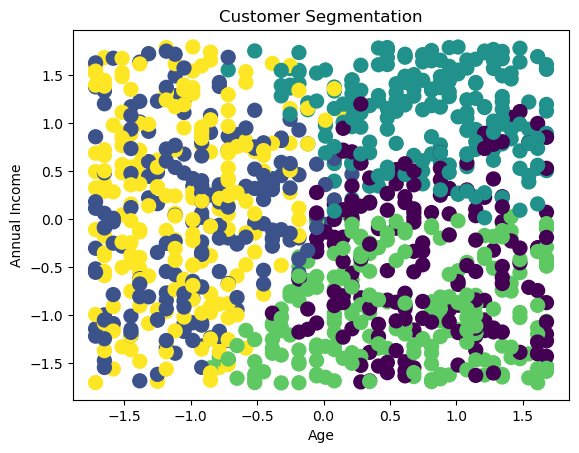

In [28]:
# Select relevant features for clustering
X = df[['age', 'income', 'spending_score']]

# Standardize features for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=100)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Select relevant features
features = ['age', 'spending_score']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Create K-means model
kmeans = KMeans(n_clusters=5)  

# Fit the model to the data
labels = kmeans.fit_predict(scaled_data)

# Evaluate the clustering
silhouette_avg = silhouette_score(scaled_data, labels)
ch_score = calinski_harabasz_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)

print("Silhouette Coefficient:", silhouette_avg)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\arbry\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Silhouette Coefficient: 0.4052041361752741
Calinski-Harabasz Index: 991.8891129707852
Davies-Bouldin Index: 0.8384383779719364


Number of clusters: 1


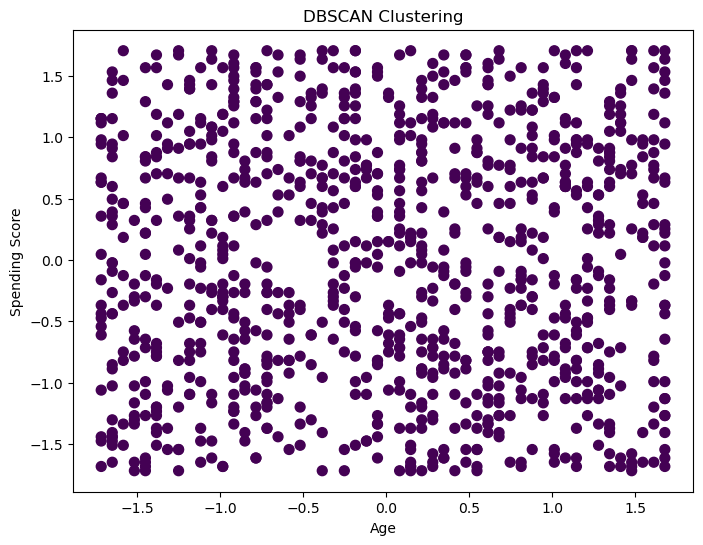

In [62]:
from sklearn.cluster import DBSCAN

# Select relevant features
features = ['age', 'spending_score']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
labels = dbscan.fit_predict(scaled_data)

# Analyze the results
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", num_clusters)

df['cluster'] = labels

# Visualize the clusters (assuming two-dimensional data)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()